**Introduction**
-

**Question:**
- What factors contribute most to a song's popularity on Spotify? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
spotify_data = pd.read_csv('data/spotifyAnalysis.csv', encoding = 'latin1')

# Display data types inferred by pandas
spotify_data.head()


,song_name,artist_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_percent,valence_percent,energy_percent,acousticness_percent,instrumentalness_percent,liveness_percent,speechiness_percent,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,...,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0,2023-7-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,...,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0,2023-3-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,...,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0,2023-6-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,...,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0,2019-8-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,...,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0,2023-5-18


In [3]:
spotify_data.shape

(100, 22)

In [4]:
spotify_data.nunique()

song_name                   100
artist_name                  85
artist_count                  4
in_spotify_playlists        100
in_spotify_charts            60
streams                     100
in_apple_playlists           81
in_apple_charts              81
in_deezer_playlists          83
in_deezer_charts             32
in_shazam_charts             78
bpm                          60
key                          11
mode                          2
danceability_percent         44
valence_percent              59
energy_percent               48
acousticness_percent         52
instrumentalness_percent     11
liveness_percent             33
speechiness_percent          19
released_date                76
dtype: int64

In [5]:
print(spotify_data.dtypes)

song_name                    object
artist_name                  object
artist_count                  int64
in_spotify_playlists          int64
in_spotify_charts             int64
streams                       int64
in_apple_playlists            int64
in_apple_charts               int64
in_deezer_playlists          object
in_deezer_charts              int64
in_shazam_charts             object
bpm                           int64
key                          object
mode                         object
danceability_percent        float64
valence_percent             float64
energy_percent              float64
acousticness_percent        float64
instrumentalness_percent    float64
liveness_percent            float64
speechiness_percent         float64
released_date                object
dtype: object


In [6]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   song_name                 100 non-null    object 
 1   artist_name               100 non-null    object 
 2   artist_count              100 non-null    int64  
 3   in_spotify_playlists      100 non-null    int64  
 4   in_spotify_charts         100 non-null    int64  
 5   streams                   100 non-null    int64  
 6   in_apple_playlists        100 non-null    int64  
 7   in_apple_charts           100 non-null    int64  
 8   in_deezer_playlists       100 non-null    object 
 9   in_deezer_charts          100 non-null    int64  
 10  in_shazam_charts          94 non-null     object 
 11  bpm                       100 non-null    int64  
 12  key                       92 non-null     object 
 13  mode                      100 non-null    object 
 14  danceabilit

`key` has 8 missing values, and `in_shazam_charts` has 6 missing values

**Remove Irrelevant Variables**
-

Since I will only analysis Spotify, so I will remove all the variables that are unrelevant to the Spotify platform. 

In [7]:
columes_to_drop = spotify_data.loc[:, 'in_apple_playlists':'in_shazam_charts']

columes_to_drop.columns

Index(['in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts'],
      dtype='object')

In [8]:
clean_spotify_data = spotify_data.drop(columes_to_drop.columns, axis = 1, inplace = True)

The date is also not relevant because the date of the data is confirmed in 2023

In [9]:
clean_spotify_data = spotify_data.drop('released_date', axis = 1)

In [10]:
clean_spotify_data

,song_name,artist_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_percent,valence_percent,energy_percent,acousticness_percent,instrumentalness_percent,liveness_percent,speechiness_percent
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,125,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
1,LALA,Myke Towers,1,1474,48,133716286,92,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0
2,vampire,Olivia Rodrigo,1,1397,113,140003974,138,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,170,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,144,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,All My Life (feat. J. Cole),"J. Cole, Lil Durk",2,2175,23,144565150,143,D#,Major,83.0,69.0,44.0,15.0,0.0,10.0,33.0
96,Say Yes To Heaven,Lana Del Rey,1,2000,46,127567540,100,F#,Minor,49.0,17.0,35.0,71.0,9.0,11.0,3.0
97,Snooze,SZA,1,2839,25,399686758,143,F,Major,56.0,39.0,55.0,14.0,0.0,11.0,13.0
98,Summertime Sadness,Lana Del Rey,1,20333,52,983637508,112,C#,Minor,56.0,24.0,66.0,7.0,0.0,12.0,3.0


In [11]:
clean_spotify_data[clean_spotify_data['instrumentalness_percent'] > 0][['song_name', 'streams']]

,song_name,streams
4,WHERE SHE GOES,303236322
15,Kill Bill,1163093654
22,I Wanna Be Yours,1297026226
53,(It Goes Like) Nanana - Edit,57876440
60,TÃ¯Â¿Â½Ã¯Â¿,111947664
72,golden hour,751134527
73,Sweater Weather,2282771485
74,"Quevedo: Bzrp Music Sessions, Vol. 52",1356565093
85,El Merengue,223633238
88,Makeba,165484133


**Missing Data**
-

In [12]:
# Convert the missing data into NaN format
clean_spotify_data.replace('', np.nan, inplace = True)

In [13]:
count_missing_values = clean_spotify_data.isna().sum()

print(count_missing_values)

song_name                   0
artist_name                 0
artist_count                0
in_spotify_playlists        0
in_spotify_charts           0
streams                     0
bpm                         0
key                         8
mode                        0
danceability_percent        0
valence_percent             0
energy_percent              0
acousticness_percent        0
instrumentalness_percent    0
liveness_percent            0
speechiness_percent         0
dtype: int64


Found that key colume has 8 missing value. So, continue checking which songs have the missing value.

In [14]:
clean_spotify_data[clean_spotify_data['key'].isna() == True]

,song_name,artist_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_percent,valence_percent,energy_percent,acousticness_percent,instrumentalness_percent,liveness_percent,speechiness_percent
12,Flowers,Miley Cyrus,1,12211,115,1316855716,118,NaN,Major,71.0,65.0,68.0,6.0,0.0,3.0,7.0
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,873,104,30546883,78,NaN,Major,44.0,14.0,9.0,96.0,0.0,10.0,3.0
22,I Wanna Be Yours,Arctic Monkeys,1,12859,110,1297026226,135,NaN,Minor,48.0,44.0,42.0,12.0,2.0,11.0,3.0
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,1150,31,123122413,120,NaN,Major,81.0,63.0,68.0,11.0,0.0,11.0,4.0
44,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,1117,80,65156199,144,NaN,Major,77.0,75.0,58.0,52.0,0.0,23.0,25.0
46,I Ain't Worried,OneRepublic,1,8431,76,1085685420,140,NaN,Major,71.0,82.0,81.0,11.0,0.0,6.0,5.0
58,S91,Karol G,1,525,41,16011326,128,NaN,Minor,86.0,42.0,72.0,59.0,0.0,9.0,19.0
59,cardigan,Taylor Swift,1,7923,29,812019557,130,NaN,Minor,61.0,53.0,58.0,55.0,0.0,27.0,4.0


**Filling in the value (From Musicnotes.com)**

In [15]:
clean_spotify_data.at[12, 'key'] = 'A'
clean_spotify_data.at[17, 'key'] = 'C'
clean_spotify_data.at[22, 'key'] = 'C'
clean_spotify_data.at[35, 'key'] = 'C'
clean_spotify_data.at[44, 'key'] = 'C'
clean_spotify_data.at[46, 'key'] = 'F'
clean_spotify_data.at[58, 'key'] = 'G'
clean_spotify_data.at[59, 'key'] = 'C'

In [16]:
print(clean_spotify_data.iloc[[12, 17, 22, 35, 44, 46, 58, 59]]['key'])

12    A
17    C
22    C
35    C
44    C
46    F
58    G
59    C
Name: key, dtype: object


In [17]:
by_clean = clean_spotify_data.groupby('key')

by_clean.count()['song_name']

key
A      6
A#     4
B      8
C      5
C#    20
D     10
D#     1
E      4
F     16
F#    11
G     10
G#     5
Name: song_name, dtype: int64

The data is unbalanced, especially the key with D#. However, we still have no idea how much does key will affect the song's popularity. So, this colume remain unchanged. 

In [18]:
clean_spotify_data[clean_spotify_data['key'] == 'D#']

,song_name,artist_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_percent,valence_percent,energy_percent,acousticness_percent,instrumentalness_percent,liveness_percent,speechiness_percent
95,All My Life (feat. J. Cole),"J. Cole, Lil Durk",2,2175,23,144565150,143,D#,Major,83.0,69.0,44.0,15.0,0.0,10.0,33.0


In artist_name column, some of it contain multiple names, so I will seperate them into new row, and other columes' data remain the same. 

In [19]:
clean_spotify_data['artist_name'] = clean_spotify_data['artist_name'].str.split(',')

In [20]:
clean_spotify_data[clean_spotify_data['artist_count'] == 2].head()

,song_name,artist_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_percent,valence_percent,energy_percent,acousticness_percent,instrumentalness_percent,liveness_percent,speechiness_percent
0,Seven (feat. Latto) (Explicit Ver.),"[Latto, Jung Kook]",2,553,147,141381703,125,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
5,Sprinter,"[Dave, Central Cee]",2,2186,91,183706234,141,C#,Major,92.0,66.0,58.0,19.0,0.0,8.0,24.0
6,Ella Baila Sola,"[Eslabon Armado, Peso Pluma]",2,3090,50,725980112,148,F,Minor,67.0,83.0,76.0,48.0,0.0,8.0,3.0
9,La Bebe - Remix,"[Peso Pluma, Yng Lvcas]",2,2953,44,553634067,170,D,Minor,81.0,56.0,48.0,21.0,0.0,8.0,33.0
10,un x100to,"[Bad Bunny, Grupo Frontera]",2,2876,40,505671438,83,F#,Minor,57.0,56.0,72.0,23.0,0.0,27.0,5.0


Making them into new row

In [21]:
clean_spotify_data = clean_spotify_data.explode('artist_name').reset_index(drop=True)

clean_spotify_data[clean_spotify_data['artist_count'] == 2].head()

,song_name,artist_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_percent,valence_percent,energy_percent,acousticness_percent,instrumentalness_percent,liveness_percent,speechiness_percent
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,553,147,141381703,125,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
1,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2,553,147,141381703,125,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
6,Sprinter,Dave,2,2186,91,183706234,141,C#,Major,92.0,66.0,58.0,19.0,0.0,8.0,24.0
7,Sprinter,Central Cee,2,2186,91,183706234,141,C#,Major,92.0,66.0,58.0,19.0,0.0,8.0,24.0
8,Ella Baila Sola,Eslabon Armado,2,3090,50,725980112,148,F,Minor,67.0,83.0,76.0,48.0,0.0,8.0,3.0


**Visualization**
-

**1. How much does an artist can impact the song's streams on Spotify?**
- My plan is to seperate the artist into quartiles based on the streams per song, this can potentially show multiple tiers of artist influence. Then, I will see how many times did the artist will appear in groups. However, there might be a question where the artist only appear once in the population, or the artist has appeared many times in this board. Actually, this dataset is the list of the most famous songs of 2023 in Spotify, and the number of appearance can showcase the influency of the artist. 

In [22]:
%matplotlib inline

Since I am not sure the exact tiers, so I use qcut instead of cut, it also ensures each tier has a fair distribution. 

In [27]:
tier_data = clean_spotify_data[['artist_name', 'streams']].copy()

tier_data

,artist_name,streams
0,Latto,141381703
1,Jung Kook,141381703
2,Myke Towers,133716286
3,Olivia Rodrigo,140003974
4,Taylor Swift,800840817
...,...,...
149,Lil Durk,144565150
150,Lana Del Rey,127567540
151,SZA,399686758
152,Lana Del Rey,983637508


In [28]:
random.seed(5)

tier_data['quartiles'], qcut_intervals = pd.qcut(tier_data['streams'], q = 4, labels = ['T1', 'T2', 'T3', 'T4'], retbins = True)

tier_data

,artist_name,streams,quartiles
0,Latto,141381703,T2
1,Jung Kook,141381703,T2
2,Myke Towers,133716286,T2
3,Olivia Rodrigo,140003974,T2
4,Taylor Swift,800840817,T3
...,...,...,...
149,Lil Durk,144565150,T2
150,Lana Del Rey,127567540,T2
151,SZA,399686758,T3
152,Lana Del Rey,983637508,T4


In [29]:
qcut_intervals

array([1.47804250e+07, 1.16144008e+08, 3.44858821e+08, 8.43957510e+08,
       3.70389507e+09])

In [30]:
tier_data['quartiles'].value_counts()

T3    40
T1    39
T2    38
T4    37
Name: quartiles, dtype: int64

Text(0, 0.5, 'Streams')

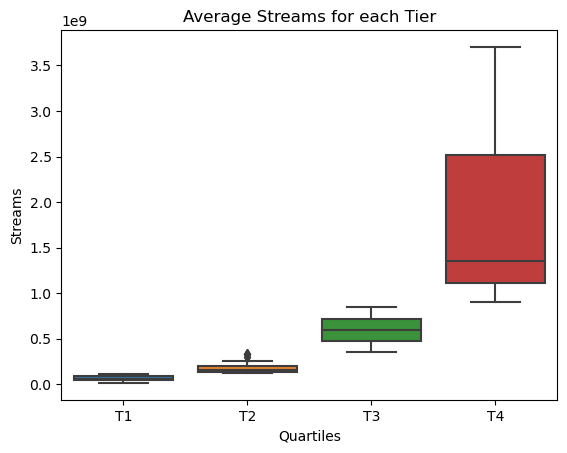

In [35]:
sns.boxplot(x = 'quartiles', y = 'streams', data = tier_data)
plt.title("Average Streams for each Tier")
plt.xlabel("Quartiles")
plt.ylabel("Streams")

Figure1: The average streams for each tier

In [54]:
tier_data[tier_data['quartiles'] == 'T4']['artist_name'].value_counts()

The Weeknd           3
Taylor Swift         2
Miley Cyrus          1
Sam Smith            1
Glass Animals        1
The Neighbourhood    1
Bizarrap             1
 Quevedo             1
Coldplay             1
 Kim Petras          1
Manuel Turizo        1
Vance Joy            1
Justin Bieber        1
 The Kid Laroi       1
Lewis Capaldi        1
Chencho Corleone     1
 Bad Bunny           1
Chris Molitor        1
Tom Odell            1
Harry Styles         1
 Daft Punk           1
OneRepublic          1
 Kali Uchis          1
 The Creator         1
Tyler                1
 David Guetta        1
Bebe Rexha           1
 Swae Lee            1
Post Malone          1
 Selena G            1
RÃ¯Â¿Â½Ã¯Â¿Â½ma      1
Arctic Monkeys       1
SZA                  1
Lana Del Rey         1
Name: artist_name, dtype: int64